Question 3

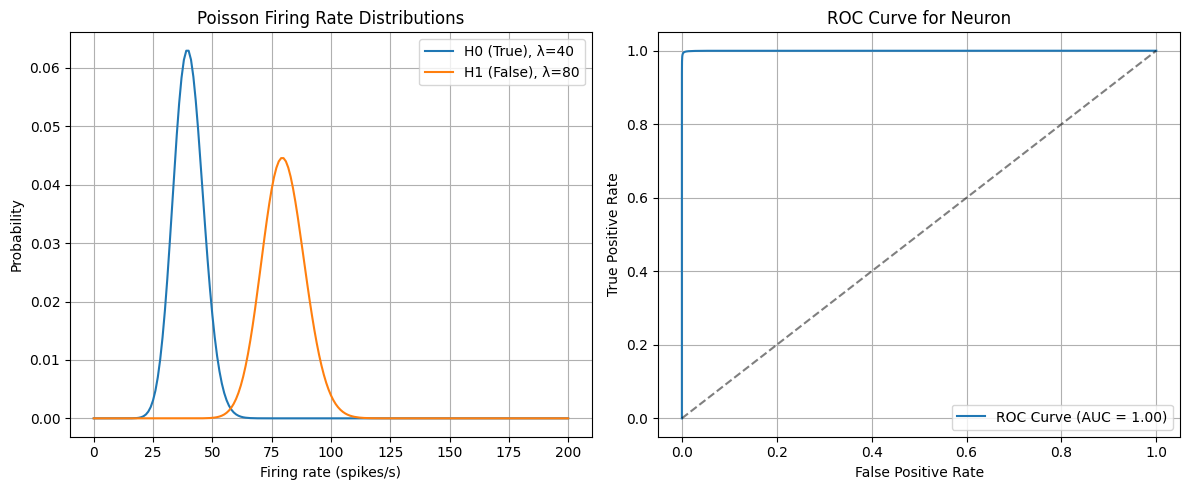

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.metrics import roc_curve, auc

lambda_H0 = 40  # True statements
lambda_H1 = 80  # False statements
max_rate = 200  # max observed
# Generate rate values (x-axis)
x = np.arange(0, max_rate + 1)

# Poisson distributions
p_H0 = poisson.pmf(x, mu=lambda_H0)
p_H1 = poisson.pmf(x, mu=lambda_H1)

# ROC curve: Treat x as thresholds, and calculate TPR/FPR
tpr = []
fpr = []

for thresh in x:
    # Predict H1 if rate ≥ threshold
    true_positive = np.sum(p_H1[x >= thresh])
    false_positive = np.sum(p_H0[x >= thresh])
    tpr.append(true_positive)
    fpr.append(false_positive)

# Calculate AUC
p_success_auc = auc(fpr, tpr)

# Plot distributions and ROC
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distributions
axs[0].plot(x, p_H0, label='H0 (True), λ=40')
axs[0].plot(x, p_H1, label='H1 (False), λ=80')
axs[0].set_title('Poisson Firing Rate Distributions')
axs[0].set_xlabel('Firing rate (spikes/s)')
axs[0].set_ylabel('Probability')
axs[0].legend()
axs[0].grid(True)

# Plot the ROC curve
axs[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {p_success_auc:.2f})')
axs[1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axs[1].set_title('ROC Curve for Neuron')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
